In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_original= pd.read_csv(r'C:\Users\NAMEERA\Desktop\Airplane_crashes_dataset_since_1908.csv', encoding='ISO-8859–1')

In [3]:
df_original.tail()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


In [4]:
df_original.shape

(5008, 17)

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  5008 non-null   object
 1   time                  5008 non-null   object
 2   location              5008 non-null   object
 3   operator              5008 non-null   object
 4   flight_no             5008 non-null   object
 5   route                 5008 non-null   object
 6   ac_type               5008 non-null   object
 7   registration          5008 non-null   object
 8   cn_ln                 5008 non-null   object
 9   all_aboard            5008 non-null   object
 10  passengers_aboard     5008 non-null   object
 11  crew_aboard           5008 non-null   object
 12  all_fatalities        5008 non-null   object
 13  passenger_fatalities  5008 non-null   object
 14  crew_fatalities       5008 non-null   object
 15  ground                5008 non-null   

In [6]:
df_withnan = df_original.copy()

In [7]:
df_withnan= df_withnan.replace('?',np.nan)

In [8]:
df_withnan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  5008 non-null   object
 1   time                  3504 non-null   object
 2   location              5003 non-null   object
 3   operator              4998 non-null   object
 4   flight_no             1326 non-null   object
 5   route                 4246 non-null   object
 6   ac_type               4995 non-null   object
 7   registration          4736 non-null   object
 8   cn_ln                 4341 non-null   object
 9   all_aboard            4991 non-null   object
 10  passengers_aboard     4787 non-null   object
 11  crew_aboard           4789 non-null   object
 12  all_fatalities        5000 non-null   object
 13  passenger_fatalities  4773 non-null   object
 14  crew_fatalities       4773 non-null   object
 15  ground                4964 non-null   

In [9]:
df_withnan.isnull().sum()

date                       0
time                    1504
location                   5
operator                  10
flight_no               3682
route                    762
ac_type                   13
registration             272
cn_ln                    667
all_aboard                17
passengers_aboard        221
crew_aboard              219
all_fatalities             8
passenger_fatalities     235
crew_fatalities          235
ground                    44
summary                   59
dtype: int64

In [10]:
for columns in df_withnan.columns:
    if df_withnan[columns].isnull().sum()>0:
        print(columns,':{:.2f}'.format(df_withnan[columns].isnull().sum()/df_withnan[columns].shape[0]))

time :0.30
location :0.00
operator :0.00
flight_no :0.74
route :0.15
ac_type :0.00
registration :0.05
cn_ln :0.13
all_aboard :0.00
passengers_aboard :0.04
crew_aboard :0.04
all_fatalities :0.00
passenger_fatalities :0.05
crew_fatalities :0.05
ground :0.01
summary :0.01


I do not find the 'time' column of much significance since 30% of the values are missing. Furthermore, the crashes have occurred in different timezones. Recognising each and every timezone from the year 1908 for 5008 entries would turn out to be a tedious task, not to mention time consuming. 
Given that this project's primary focus is exploratory data analysis, the flight_no feature is rendered insignificant thus far for its values are missing by 74%. 

To visualise data and its relevance with each feature, the data types need to be looked into. In reference to df_withnan.info(), the data types are pandas objects, AKA strings. Visualising strings in python would generate errors, hence, the data types are required to be converted respectively. 

In [11]:
df = df_withnan.drop('time',axis=1)

In [12]:
df= df.drop('flight_no',axis=1)

In [13]:
df.head()

,date,location,operator,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909","Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913","Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


In [14]:
df['date']= pd.to_datetime(df['date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  5008 non-null   datetime64[ns]
 1   location              5003 non-null   object        
 2   operator              4998 non-null   object        
 3   route                 4246 non-null   object        
 4   ac_type               4995 non-null   object        
 5   registration          4736 non-null   object        
 6   cn_ln                 4341 non-null   object        
 7   all_aboard            4991 non-null   object        
 8   passengers_aboard     4787 non-null   object        
 9   crew_aboard           4789 non-null   object        
 10  all_fatalities        5000 non-null   object        
 11  passenger_fatalities  4773 non-null   object        
 12  crew_fatalities       4773 non-null   object        
 13  ground            

In [16]:
df.head()

,date,location,operator,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


In [17]:
nan_route_cn_ln = df[df['route'].isnull() & df['cn_ln'].isnull()]

In [18]:
nan_route_cn_ln

,date,location,operator,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...
5,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,28,NaN,NaN,28,NaN,NaN,0,Hydrogen gas which was being vented was sucked...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),NaN,NaN,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
7,1915-09-03,"Off Cuxhaven, Germany",Military - German Navy,NaN,Zeppelin L-10 (airship),NaN,NaN,19,NaN,NaN,19,NaN,NaN,0,"Exploded and burned near Neuwerk Island, when..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,2010-02-14,"Near Saada, Yemen",Military - Yemeni Arm,NaN,Helicopter,NaN,NaN,11,9,2,11,9,2,2,The helicopter crashed into a military vehicle...
4785,2010-09-21,"Chopan district, Zabul Province, Afghanistan",International Security Assistance Force,NaN,Sikorsky UH-60 Black Hawk,93-26517,NaN,13,NaN,NaN,10,NaN,NaN,0,The military helicopter crashed while en route...
4786,2010-10-06,"Rasht Valley, Tajikistan",Military - Tajik National Guard,NaN,Mi-8,NaN,NaN,28,NaN,NaN,28,NaN,NaN,0,The military helicopter crashed after hitting ...
4813,2011-08-06,"Tangi Valley, Afghanistan",Military - U.S. Army,NaN,Boeing CH-47 Chinook,NaN,NaN,38,NaN,NaN,38,NaN,NaN,0,"Thirty-eight people, including 31 U.S. special..."


In [19]:
for columns in nan_route_cn_ln.columns:
    if nan_route_cn_ln[columns].isnull().sum()>0:
        print(columns,':{:.2f}'.format(nan_route_cn_ln[columns].isnull().sum()/nan_route_cn_ln[columns].shape[0]))

location :0.01
operator :0.01
route :1.00
ac_type :0.02
registration :0.43
cn_ln :1.00
all_aboard :0.04
passengers_aboard :0.38
crew_aboard :0.38
all_fatalities :0.02
passenger_fatalities :0.38
crew_fatalities :0.38
ground :0.05
summary :0.10


The the 'cn_ln' feature represents the construction/fuselage number. Although this could be used for a valid observation from a technical vantage point, it is quite unlikely to impart otherwise. 

In [20]:
df = df.drop('cn_ln',axis=1)

In [21]:
df.isnull().sum()

date                      0
location                  5
operator                 10
route                   762
ac_type                  13
registration            272
all_aboard               17
passengers_aboard       221
crew_aboard             219
all_fatalities            8
passenger_fatalities    235
crew_fatalities         235
ground                   44
summary                  59
dtype: int64

In [22]:
df = df.dropna(axis='rows',thresh=10)

In [23]:
df.isnull().sum()

date                      0
location                  5
operator                  7
route                   603
ac_type                   4
registration            183
all_aboard                2
passengers_aboard        40
crew_aboard              38
all_fatalities            0
passenger_fatalities     55
crew_fatalities          54
ground                   28
summary                  26
dtype: int64

In [24]:
#To fill missing values with 'NoRouteFound'
df['route'].fillna(value='NoRouteFound',inplace=True)

In [25]:
df.isnull().sum()

date                      0
location                  5
operator                  7
route                     0
ac_type                   4
registration            183
all_aboard                2
passengers_aboard        40
crew_aboard              38
all_fatalities            0
passenger_fatalities     55
crew_fatalities          54
ground                   28
summary                  26
dtype: int64

In [26]:
df.dropna(axis='rows',thresh=5)

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NoRouteFound,Curtiss seaplane,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NaN,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,2021-05-21,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NoRouteFound,Beechcraft B300 King Air 350i,NAF203,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,2021-07-04,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96,88,8,50,NaN,NaN,3,"While attempting to land at Jolo Airport, the ..."


In [27]:
df.isnull().sum()

date                      0
location                  5
operator                  7
route                     0
ac_type                   4
registration            183
all_aboard                2
passengers_aboard        40
crew_aboard              38
all_fatalities            0
passenger_fatalities     55
crew_fatalities          54
ground                   28
summary                  26
dtype: int64

In [28]:
df['registration'].fillna(value='NoRegistration',inplace=True)

In [29]:
df.isnull().sum()

date                     0
location                 5
operator                 7
route                    0
ac_type                  4
registration             0
all_aboard               2
passengers_aboard       40
crew_aboard             38
all_fatalities           0
passenger_fatalities    55
crew_fatalities         54
ground                  28
summary                 26
dtype: int64

In [30]:
for columns in df.columns:
    if df[columns].isnull().sum()>0:
        print(columns,':{:.2%}'.format(df[columns].isnull().sum()/df[columns].shape[0]))

location :0.10%
operator :0.15%
ac_type :0.08%
all_aboard :0.04%
passengers_aboard :0.83%
crew_aboard :0.79%
passenger_fatalities :1.14%
crew_fatalities :1.12%
ground :0.58%
summary :0.54%


In [31]:
df['location'].isnull().sum()

5

In [32]:
null_location = df[df['location'].isnull()]

In [33]:
null_location

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
360,1934-12-31,NaN,Aeroflot,NoRouteFound,Tupolev ANT-9,NoRegistration,10,8,2,10,8,2,0,Crashed under unknown circumstances.
465,1937-06-20,NaN,ENTA,San José San Isidro de El General,Travel Air 6000,TI-3,6,5,1,6,5,1,NaN,Hit trees and crashed in an isolated area loca...
646,1942-08-21,NaN,Deutsche Lufthansa,NoRouteFound,Siebel Si-204,NoRegistration,4,2,2,4,2,2,0,"Lufthansa chairman, Von Gablenz killed."
999,1947-11-27,NaN,China National Aviation Corporation,NoRouteFound,Douglas DC-3,NoRegistration,3,0,3,2,0,2,0,The cargo plane was shot down by communist ant...
2895,1977-01-20,NaN,North Canada Air,NoRouteFound,Bristol 170 Freighter 31M,C-FWAD,2,0,2,1,0,1,0,The cargo plane stalled nearly vertical and cr...


In [34]:
i=df[(df.date=='1942-08-21')].index

In [35]:
i3=df[(df.date=='1977-01-20')].index

In [36]:
df.drop(i)

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NoRegistration,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NoRegistration,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NoRouteFound,Curtiss seaplane,NoRegistration,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NoRegistration,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,2021-05-21,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NoRouteFound,Beechcraft B300 King Air 350i,NAF203,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,2021-07-04,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96,88,8,50,NaN,NaN,3,"While attempting to land at Jolo Airport, the ..."


In [37]:
#i2=df[(df.date=='1947-11-27')].index ---- 3 crashes on the same day

In [38]:
i2=df[(df.date=='1934-12-31')].index

In [39]:
i2

Int64Index([360], dtype='int64')

In [40]:
df.drop(i2)

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NoRegistration,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NoRegistration,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NoRouteFound,Curtiss seaplane,NoRegistration,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NoRegistration,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,2021-05-21,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NoRouteFound,Beechcraft B300 King Air 350i,NAF203,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,2021-07-04,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96,88,8,50,NaN,NaN,3,"While attempting to land at Jolo Airport, the ..."


In [41]:
df.drop(i3)

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NoRegistration,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NoRegistration,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NoRouteFound,Curtiss seaplane,NoRegistration,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NoRegistration,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,2021-05-21,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NoRouteFound,Beechcraft B300 King Air 350i,NAF203,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,2021-07-04,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96,88,8,50,NaN,NaN,3,"While attempting to land at Jolo Airport, the ..."


In [42]:
df.iloc[360]

date                                                  1935-09-01 00:00:00
location                                              Burbank, California
operator                                              Western Air Express
route                                    Burbank, CA - Salt Lake City, UT
ac_type                                                        Boeing 247
registration                                                      NC13314
all_aboard                                                              3
passengers_aboard                                                       0
crew_aboard                                                             3
all_fatalities                                                          3
passenger_fatalities                                                    0
crew_fatalities                                                         3
ground                                                                  0
summary                 A few minutes 

In [43]:
df.isnull().sum()

date                     0
location                 5
operator                 7
route                    0
ac_type                  4
registration             0
all_aboard               2
passengers_aboard       40
crew_aboard             38
all_fatalities           0
passenger_fatalities    55
crew_fatalities         54
ground                  28
summary                 26
dtype: int64

In [44]:
null_operator= df[df['operator'].isnull()]

In [45]:
null_operator

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
67,1922-04-08,"Pao Ting Fou, China",NaN,Test,NaN,NoRegistration,17,0,17,17,0,17,0,Aboard were all workers taking part in a fligh...
69,1922-07-04,"Fuhlsbuttel, Germany",NaN,Hamburg - Berlin,LVG C VI,NoRegistration,3,2,1,2,1,1,0,The passenger/mail plane lost it's engine whil...
114,1926-09-26,"New York, New York",NaN,New York - Paris,Sikorsky S-25,NoRegistration,5,4,1,2,2,0,0,Too much weight caused the landing gear to col...
859,1946-04-08,"Near Shensi, China",NaN,Shensi - Yenan,NaN,NoRegistration,14,11,3,14,11,3,0,NaN
2061,1963-09-02,Northeast Laos,NaN,NoRouteFound,Curtiss C-46 Commando,NoRegistration,16,13,3,15,12,3,NaN,Refugee flight.
4830,2011-12-26,"Green Grove, Florida",NaN,"Jacksonville, FL - Gainsville, FL",Bell 206B,N5016M,3,2,1,3,2,1,0,The on-demand air taxi was on a flight to proc...


In [46]:
i_o1= df[((df.date=='1922-04-08')&(df.location=='Pao Ting Fou, China')&(df.route=='Test'))].index

In [47]:
df.drop(i_o1)

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NoRegistration,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NoRegistration,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NoRouteFound,Curtiss seaplane,NoRegistration,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NoRegistration,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,2021-05-21,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NoRouteFound,Beechcraft B300 King Air 350i,NAF203,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,2021-07-04,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96,88,8,50,NaN,NaN,3,"While attempting to land at Jolo Airport, the ..."


In [48]:
df.loc[i_o1]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
67,1922-04-08,"Pao Ting Fou, China",NaN,Test,NaN,NoRegistration,17,0,17,17,0,17,0,Aboard were all workers taking part in a fligh...


In [49]:
df=df.drop(i_o1)


In [50]:
df

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NoRegistration,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NoRegistration,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NoRouteFound,Curtiss seaplane,NoRegistration,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NoRegistration,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,2021-05-21,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NoRouteFound,Beechcraft B300 King Air 350i,NAF203,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,2021-07-04,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96,88,8,50,NaN,NaN,3,"While attempting to land at Jolo Airport, the ..."


In [51]:
df.isnull().sum()

date                     0
location                 5
operator                 6
route                    0
ac_type                  3
registration             0
all_aboard               2
passengers_aboard       40
crew_aboard             38
all_fatalities           0
passenger_fatalities    55
crew_fatalities         54
ground                  28
summary                 26
dtype: int64

In [52]:
df.loc[i]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
646,1942-08-21,NaN,Deutsche Lufthansa,NoRouteFound,Siebel Si-204,NoRegistration,4,2,2,4,2,2,0,"Lufthansa chairman, Von Gablenz killed."


In [53]:
df.loc[i3]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
2895,1977-01-20,NaN,North Canada Air,NoRouteFound,Bristol 170 Freighter 31M,C-FWAD,2,0,2,1,0,1,0,The cargo plane stalled nearly vertical and cr...


In [54]:
df=df.drop(i)

In [55]:
df = df.drop(i3)

In [56]:
df.isnull().sum()

date                     0
location                 3
operator                 6
route                    0
ac_type                  3
registration             0
all_aboard               2
passengers_aboard       40
crew_aboard             38
all_fatalities           0
passenger_fatalities    55
crew_fatalities         54
ground                  28
summary                 26
dtype: int64

In [57]:
df['operator'].fillna(value='NoOperator',inplace=True)

In [58]:
df.isnull().sum()

date                     0
location                 3
operator                 0
route                    0
ac_type                  3
registration             0
all_aboard               2
passengers_aboard       40
crew_aboard             38
all_fatalities           0
passenger_fatalities    55
crew_fatalities         54
ground                  28
summary                 26
dtype: int64

In [59]:
df['location'].fillna(value='NotFound',inplace=True)

In [60]:
ac_type = df[df['ac_type'].isnull()]

In [61]:
ac_type

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
859,1946-04-08,"Near Shensi, China",NoOperator,Shensi - Yenan,NaN,NoRegistration,14,11,3,14,11,3,0,NaN
1268,1951-08-08,"Barilla Bay, Australia",Trans Australia Airlines,Hobart Melbourne,NaN,VH-TAT,2,0,2,2,0,2,0,Cargo plane. Loss of lateral control during a ...
1924,1961-11-22,"Harare, Zimbabwe",Rhodesian Air Services,Salisbury - Livingstone - Elizabethville,NaN,VP-YRX,3,0,3,3,0,3,0,The aircraft was on a charter flight to Living...


In [62]:
i_ac= df[((df.date=='1946-04-08')&(df.location=='Near Shensi, China')&(df.route=='Shensi - Yenan'))].index

In [63]:
df=df.drop(i_ac)

In [64]:
df['ac_type'].fillna(value='NotFound',inplace=True)

In [65]:
df.isnull().sum()

date                     0
location                 0
operator                 0
route                    0
ac_type                  0
registration             0
all_aboard               2
passengers_aboard       40
crew_aboard             38
all_fatalities           0
passenger_fatalities    55
crew_fatalities         54
ground                  28
summary                 25
dtype: int64

In [66]:
missing_aboard = df[(df['passengers_aboard'].isnull())&(df['crew_aboard'].isnull())]

In [67]:
missing_aboard

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
26,1919-07-21,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,NoRegistration,NaN,NaN,NaN,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi..."
87,1923-12-23,Over the Mediterranean Sea,Military - French Navy,Toulon - Algiers,Zeppelin Dixmunde (airship),L-72,52,NaN,NaN,52,NaN,NaN,0,"Crashed while on a flight from Toulon, France ..."
231,1930-10-05,"Near Beauvais, France",Military - British Air Ministry,"Cardington, England - Karachi, Pakistan",Royal Airship Works R-101,G-FAAW,54,NaN,NaN,48,NaN,NaN,0,The airship was on its inaugural flight from C...
505,1938-05-10,"Mangere, New Zealand",United Airways of New Zealand,Auckland - Palmerston North,Lockheed 10 Electra,ZK-AFC,2,NaN,NaN,2,NaN,NaN,0,After experiencing engine failure while taking...
766,1945-01-08,"Port of Spain, Trinidad",Pan American World Airways,Miami - Leopoldville,Martin M-130 (flying boat),NC14716,30,NaN,NaN,23,NaN,NaN,0,The aircraft crashed 1.25 miles short of the i...
798,1945-07-04,North Atlantic Ocean,Military -Royal Air Force,Montreal - Gander - Keflavik - Prestwick - Nor...,Consolidated LB-30A Liberator,JT982,15,NaN,NaN,15,NaN,NaN,0,Disappeared on a trans-Atlantic flight from Mo...
877,1946-07-26,"Near Huatesco, Veracruz, Mexico",Communicaciones Aereos de veracruz,Jalapa - Cordoba,Fairchild Pilgrim 100A,XA-DEJ,9,NaN,NaN,9,NaN,NaN,0,Returned to the airport after suffering engine...
973,1947-07-15,"Vichy ,France",Aero Cargo,Paris - Vichy,Junkers Ju-52/3m,F-BCHH,19,NaN,NaN,1,NaN,NaN,0,Lost control while landing and crashed.
1098,1949-02-02,"Trinity Bay, Newfoundland",Saint Lawrence Airways,Trinity - Rimouski,Avro Anson,CF-FEO,10,NaN,NaN,6,NaN,NaN,0,Crashed shortly after taking off.
1149,1949-12-10,"Near Hoikow, China",Civil Air Transport,Chengdu - Hoikow,Curtiss C-46D-CU,XT-814,40,NaN,NaN,17,NaN,NaN,0,"Crashed on the outskirts of Hoikow, Hainan Isl..."


In [68]:
missing_fatalities = df[(df['passenger_fatalities'].isnull())&(df['crew_fatalities'].isnull())]

In [69]:
missing_fatalities.isnull().sum()

date                     0
location                 0
operator                 0
route                    0
ac_type                  0
registration             0
all_aboard               0
passengers_aboard       34
crew_aboard             34
all_fatalities           0
passenger_fatalities    51
crew_fatalities         51
ground                   0
summary                  1
dtype: int64

In [70]:
missing_aboard.isnull().sum()

date                     0
location                 0
operator                 0
route                    0
ac_type                  0
registration             0
all_aboard               2
passengers_aboard       37
crew_aboard             37
all_fatalities           0
passenger_fatalities    34
crew_fatalities         34
ground                   0
summary                  0
dtype: int64

In [71]:
df.isnull().sum()

date                     0
location                 0
operator                 0
route                    0
ac_type                  0
registration             0
all_aboard               2
passengers_aboard       40
crew_aboard             38
all_fatalities           0
passenger_fatalities    55
crew_fatalities         54
ground                  28
summary                 25
dtype: int64

In [72]:
ground_summary_na= df[(df['ground'].isnull())&(df['summary'].isnull())]

In [73]:
ground_summary_na

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary


In [74]:
ground = df[(df['ground'].isnull())]

In [75]:
ground

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
234,1930-10-13,"Perth, Australia",Wings Ltd,NoRouteFound,de Havilland DH.80 Puss Moth,VH-UPC,3,2,1,3,2,1,NaN,"Fflying over the Darling Range, aircraft went ..."
239,1930-11-18,"Techachapi Mountains, California",Pacific Air Transport,"Burbank, CA - Oakland, CA",Boeing 40,NC5340,3,0,3,3,0,3,NaN,Crashed into a mountainside at an altitude of ...
322,1933-11-09,"Portland, Oregon",United Air Lines,"Seattle, WA - Dallas, TX",Boeing 247,NC13345,10,7,3,4,3,1,NaN,Crashed in a thickly wooded area upon taking o...
324,1933-11-20,"Near Tsinan, China",China National Aviation Corporation,Canton - Shanghai,Stinson,NoRegistration,8,7,1,8,7,1,NaN,Crashed into the Chingshan mountain range in fog.
465,1937-06-20,NotFound,ENTA,San José San Isidro de El General,Travel Air 6000,TI-3,6,5,1,6,5,1,NaN,Hit trees and crashed in an isolated area loca...
481,1937-11-12,"Warsaw, Poland",LOT,Krakow - Warsaw,Lockhed 10 Electra,SP-AYD,11,9,2,4,2,2,NaN,On final approach at night and in poor visibil...
515,1938-07-19,Andes,Panagra,NoRouteFound,Douglas DC-2,NC14272,4,0,4,4,0,4,NaN,Disappeared over the Andes mountains. Wreckage...
571,1939-11-20,"Gosport, England",British Airways,Training,Airspeed Oxford,G-AFFM,2,0,2,2,0,2,NaN,Collided with the mooring of a ballon.went out...
632,1942-02-19,"Zhengzhou-Xinzheng, China",China National Aviation Corporation,NoRouteFound,Douglas DC-2,45,1,0,1,1,0,1,NaN,Crashed under unknown circumstances.
829,1945-11-13,"Near Tacloban, Philippines",Australian National Airways,NoRouteFound,Douglas C-48,VH-CDC,17,14,3,16,13,3,NaN,Crashed into the sea afte an aborted landing a...


In [76]:
summary = df[(df['summary'].isnull())]

In [77]:
summary

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
28,1919-10-02,"Newcastle, England",Aircraft Transport and Travel,NoRouteFound,De Havilland DH-4,NoRegistration,1,0,1,1,0,1,0,NaN
256,1931-07-14,"Temora, Australia",Australian Aerial Services,NoRouteFound,Lasco Lascowl,VH-UGF,2,0,2,2,0,2,0,NaN
257,1931-07-21,"Centralia, Illinois",American Airways,NoRouteFound,Pitcairn PA-6 Mailwing,NoRegistration,1,0,1,1,0,1,0,NaN
264,1931-10-14,Brazil,Syndicato Condor,NoRouteFound,Dornier Wal,P-BALSA,3,0,3,3,0,3,0,NaN
321,1933-10-31,"Etobon, France",Air France,Zurich - Basel - Paris,Farman F-301,F-AJMI,5,2,3,2,1,1,0,NaN
337,1934-04-10,"Ningpo Bay, China",China National Aviation Corporation,NoRouteFound,Sikorsky S-38BB,NV17V,3,1,2,3,1,2,0,NaN
553,1939-03-16,"Manzanares, Colombia",Deutsche Lufthansa,NoRouteFound,Junkers JU-86,NoRegistration,8,6,2,8,6,2,0,NaN
746,1944-10-10,Bosnia,Deutsche Lufthansa,NoRouteFound,Junkers JU-52/3m,D-AUSS,7,4,3,7,4,3,0,NaN
769,1945-01-16,"Near Kunming, China",China National Aviation Corporation,Chongqing - Kunming,Douglas C-47,NoRegistration,3,0,3,3,0,3,0,NaN
778,1945-02-23,"Casablanca, Morocco",Military - United States Army Air Force,NoRouteFound,Curtiss C-46A,42-107377,30,26,4,13,13,0,0,NaN


In [78]:
df = df.dropna()

In [79]:
df.isnull().sum()

date                    0
location                0
operator                0
route                   0
ac_type                 0
registration            0
all_aboard              0
passengers_aboard       0
crew_aboard             0
all_fatalities          0
passenger_fatalities    0
crew_fatalities         0
ground                  0
summary                 0
dtype: int64

In [80]:
df.dtypes

date                    datetime64[ns]
location                        object
operator                        object
route                           object
ac_type                         object
registration                    object
all_aboard                      object
passengers_aboard               object
crew_aboard                     object
all_fatalities                  object
passenger_fatalities            object
crew_fatalities                 object
ground                          object
summary                         object
dtype: object

In [81]:
int_col= ['all_aboard','passengers_aboard','crew_aboard','all_fatalities','passenger_fatalities','crew_fatalities','ground']
for col in df[int_col]:
    df[col]= df[col].astype(int)
    assert df[col].dtype==int
print(df.dtypes)

date                    datetime64[ns]
location                        object
operator                        object
route                           object
ac_type                         object
registration                    object
all_aboard                       int32
passengers_aboard                int32
crew_aboard                      int32
all_fatalities                   int32
passenger_fatalities             int32
crew_fatalities                  int32
ground                           int32
summary                         object
dtype: object


In [82]:
all_fatalities = df.groupby('location')['all_fatalities'].mean()


In [83]:
all_fatalities

location
1,200 miles off Dakar, Atlantic Ocean           52.00
110 miles SW of Sochi, Russia                   78.00
125 miles ENE of Tokyo, Japan                    6.00
175 miles off the Egyptian coast                66.00
200 miles NE of Derby, Australia                 4.00
                                                ...  
Zhengchang, Suiyang County, Guizhou Province    12.00
Zifta, Egypt                                     4.00
Zurich, Switzerland                             24.75
Zwingle, Iowa                                    8.00
near Craigavad, Northern Ireland                 6.00
Name: all_fatalities, Length: 3887, dtype: float64

In [84]:
multiple_death_location = all_fatalities.value_counts()>=10

In [85]:
multiple_death_location

1.000000       True
2.000000       True
3.000000       True
4.000000       True
5.000000       True
              ...  
3.166667      False
46.500000     False
120.000000    False
67.500000     False
60.500000     False
Name: all_fatalities, Length: 333, dtype: bool

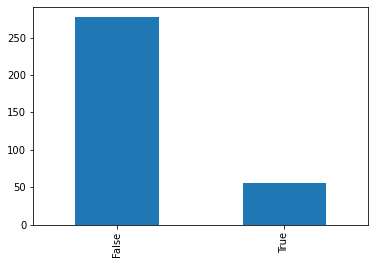

In [86]:
multiple_death_location.value_counts().plot(kind='bar')
plt.show()

In [87]:
df.columns

Index(['date', 'location', 'operator', 'route', 'ac_type', 'registration',
       'all_aboard', 'passengers_aboard', 'crew_aboard', 'all_fatalities',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [88]:
by_operator = df.groupby(['date'],as_index= False)['operator'].count()

In [89]:
top_100_crashes = by_operator.sort_values(by=['operator'],ascending=False)
top_100_crashes

,date,operator
3714,2001-09-11,4
817,1947-11-27,3
1672,1962-09-10,3
767,1947-01-25,3
2134,1970-12-31,3
...,...,...
1498,1959-10-23,1
1499,1959-10-26,1
1501,1959-11-04,1
1503,1959-11-21,1


In [90]:
#grouping number of crashes in a date range
operator_fatalities_sum = df.groupby('operator').all_fatalities.sum()
operator_fatalities_sum

operator
46826/109                         1
A B Aerotransport                 3
AB Aerotransport                 65
ACES Colombia                    40
ADC Airlines                     97
                                 ..
Zantop Air Transport             10
Zantop International Airlines     4
de Havilland Air Service          4
u.s. Air Force                   10
èkoda (India) Ltd                 3
Name: all_fatalities, Length: 2177, dtype: int32

In [91]:
operator_location_sum = df.groupby(['location','operator','ac_type']).all_fatalities.sum()
operator_location_sum

location                               operator                         ac_type                      
1,200 miles off Dakar, Atlantic Ocean  Air France                       Latecoere 631 (flying boat)      52
110 miles SW of Sochi, Russia          Sibir Airlines                   Tupolev Tu-154M                  78
125 miles ENE of Tokyo, Japan          Varig                            Boeing B-707-326C                 6
175 miles off the Egyptian coast       EgyptAir                         Airbus A320-232                  66
200 miles NE of Derby, Australia       Heliwork WA Pty Ltd. - Air Taxi  Robertson R44 helicopter          4
                                                                                                         ..
Zurich, Switzerland                    El Al                            Douglas DC-4                      6
                                       Sabena                           Convair CV-240                    1
                                  

In [92]:
df_date_index = df.set_index('date')

In [93]:
df_date_index

,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
date,,,,,,,,,,,,,
1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NoRegistration,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1909-09-07,"Juvisy-sur-Orge, France",NoOperator,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NoRegistration,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
1913-08-06,"Victoria, British Columbia, Canada",Private,NoRouteFound,Curtiss seaplane,NoRegistration,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NoRegistration,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02,"Pieri, Sudan",South Sudan Supreme Airlines,Pieri - Yuai,Let L-410UVP-E,HK-4274,10,8,2,10,8,2,0,One of the engines on the aircraft failed 10 m...
2021-03-28,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
2021-05-21,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NoRouteFound,Beechcraft B300 King Air 350i,NAF203,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."


<AxesSubplot:xlabel='date'>

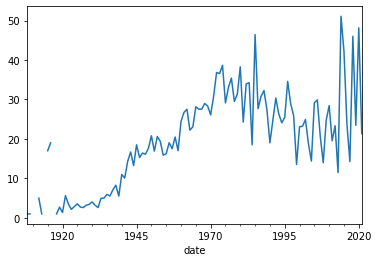

In [94]:
df_date_index.all_fatalities.resample('Y').mean().plot()

<AxesSubplot:xlabel='date'>

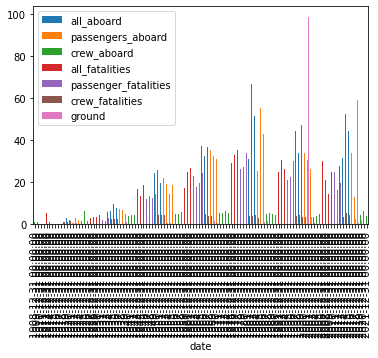

In [95]:
df_date_index.resample('Y').mean().plot(kind='bar')

In [96]:
date = df['date']
location = df[['date','location']]
date_location = pd.merge(date,location,on='date')
date_location

,date,location
0,1908-09-17,"Fort Myer, Virginia"
1,1909-09-07,"Juvisy-sur-Orge, France"
2,1912-07-12,"Atlantic City, New Jersey"
3,1913-08-06,"Victoria, British Columbia, Canada"
4,1915-03-05,"Tienen, Belgium"
...,...,...
5542,2021-03-02,"Pieri, Sudan"
5543,2021-03-28,"Near Butte, Alaska"
5544,2021-05-21,"Near Kaduna, Nigeria"
5545,2021-06-10,"Near Pyin Oo Lwin, Myanmar"


<AxesSubplot:ylabel='Frequency'>

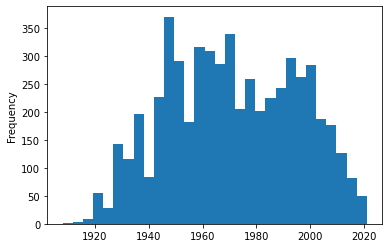

In [97]:
date_location.date.dt.year.plot(kind='hist',bins=30)

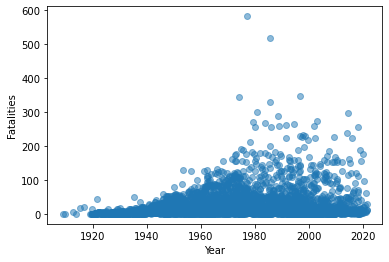

In [98]:
plt.scatter(df['date'],df['all_fatalities'],alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.show()

It is quite evident that as we progressed in the aviation sector, the number of fatalities have skyrocketed in comparison to the very first flight that ever took place. This isn't an assumption that poses a threat to the aviation sector but a mere factual evidence of the human race's progression in science leading to air travel as a commonality. However, as common as air travel had become, the lives lost during an air crash were just as many.

In [99]:
(df['all_fatalities']>=500).value_counts()

False    4707
True        2
Name: all_fatalities, dtype: int64

In [100]:
anomaly_fatality= df[df['all_fatalities']>=500]

In [101]:
anomaly_fatality

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
2902,1977-03-27,"Tenerife, Canary Islands",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,644,614,30,583,560,23,0,Both aircraft were diverted to Tenerife becaus...
3341,1985-08-12,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,Tokyo - Osaka,Boeing B-747-SR46,JA8119,524,509,15,520,505,15,0,The aircraft suffered an aft pressure bulkhead...


In [102]:
print(df['all_fatalities'].max())

583


In [103]:
print(df['all_fatalities'].min())

0


In [104]:
increased_fatalities = df[df['all_fatalities']>=150]

In [105]:
increased_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 2342 to 4994
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  77 non-null     datetime64[ns]
 1   location              77 non-null     object        
 2   operator              77 non-null     object        
 3   route                 77 non-null     object        
 4   ac_type               77 non-null     object        
 5   registration          77 non-null     object        
 6   all_aboard            77 non-null     int32         
 7   passengers_aboard     77 non-null     int32         
 8   crew_aboard           77 non-null     int32         
 9   all_fatalities        77 non-null     int32         
 10  passenger_fatalities  77 non-null     int32         
 11  crew_fatalities       77 non-null     int32         
 12  ground                77 non-null     int32         
 13  summary          

In [106]:
increased_fatalities

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
2342,1968-05-12,"Kham Duc, Vietnam",Military - U.S. Air Force,Kham Duc - Saigon,Lockheed C-130B Hercules,60-0297,155,149,6,155,149,6,0,Shot down by enemy fire while attempting to ev...
2554,1971-07-30,"Near Morioko, Japan",All Nippon Airways / Japanese Air Force,Sapporo - Tokyo,Boeing B-727-281 / Air Force F86F,JA8329 / ?,164,155,9,163,155,8,0,A Japan Air Self Defense Force F-86F fighter c...
2628,1972-08-14,"Near Konigs Wusterausen, East Germany",Interflug,Berlin - Birgas,Ilyushin IL-62,DM-SEA,156,148,8,156,148,8,0,"In cargo bay 6, hot air, leaking from an air c..."
2642,1972-10-13,"Near Moscow, USSR",Aeroflot,Leningrad - Moscow,Ilyushin IL-62,CCCP-86671,174,164,10,174,164,10,0,The aircraft crashed at the outer marker while...
2652,1972-12-03,"Tenerife, Canary Islands",Spantax,Tenerife - Munchen,Convair CV-990-30A-5 Coronado,EC-BZR,155,148,7,155,148,7,0,Reached a height of 300 feet when the plane s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,2015-10-31,"Near Hasna, Egypt",Metrojet,Sharem el Sheikh - St. Petersburg,Airbus A321-231,EI-ETJ,224,217,7,224,217,7,0,Approximate 25 minutes after taking off from S...
4969,2018-04-11,"Boufarik AB, Algeria",Military - Algerian Air Force,Boufarik AB - Bechar - Tindouf,Ilyushin 76-TD,7T-WIP,257,247,10,257,247,10,0,The Algerian military plane crashed soon after...
4978,2018-10-29,"Off Jakarta, Indonesia",Lion Air,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,189,181,8,189,181,8,0,"The airliner crashed into the Jakarta Sea, 13 ..."
4983,2019-03-10,"Bishoftu, Ethiopia",Ethiopian Airlines,Addis Ababa - Nairobi,Boeing 737 Max 8,ET-AVJ,157,149,8,157,149,8,0,The internationally scheduled airliner crashed...


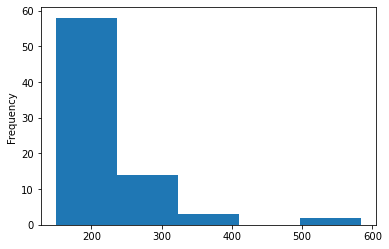

In [107]:
increased_fatalities.all_fatalities.plot(kind='hist',bins=5)
plt.show()

In [108]:
increased_fatalities['location'].str.split().str.get(-1)

2342      Vietnam
2554        Japan
2628      Germany
2642         USSR
2652      Islands
          ...    
4919        Egypt
4969      Algeria
4978    Indonesia
4983     Ethiopia
4994         Iran
Name: location, Length: 77, dtype: object

In [109]:
increased_fatalities['location'].str.split().str.get(-1).value_counts()

Iran             4
Russia           3
India            3
USSR             3
Japan            3
Nigeria          3
France           3
Brazil           3
Arabia           3
Indonesia        2
Ukraine          2
Taiwan           2
Lanka            2
Islands          2
Canada           2
York             2
Vietnam          2
Ocean            2
Spain            2
Niger            1
Pakistan         1
Colombia         1
Poland           1
Guam             1
Ethiopia         1
Libya            1
Thailand         1
Sea              1
Michigan         1
Coast            1
Surinam          1
Algeria          1
Ireland          1
Morocco          1
Egypt            1
Republic         1
Venezuela        1
Germany          1
Massachusetts    1
Nepal            1
Comoros          1
Antarctica       1
Illinois         1
Turkey           1
China            1
Mexico           1
Yugoslavia       1
Scotland         1
Name: location, dtype: int64

In [110]:
country_crashes = df['location'].str.split().str.get(-1).value_counts()
country_crashes

Russia         246
Brazil         163
Colombia       147
Canada         125
France         115
              ... 
Massachutes      1
Canada2          1
Indian           1
Tasmania         1
Reunion          1
Name: location, Length: 362, dtype: int64

<AxesSubplot:>

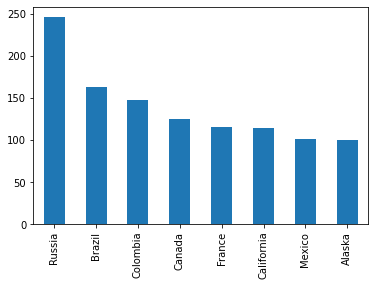

In [111]:
country_crashes[country_crashes>=100].plot(kind='bar')

In [112]:
operator_crashes= df['operator'].value_counts()
operator_crashes

Aeroflot                                     245
Military - U.S. Air Force                    132
Air France                                    63
Deutsche Lufthansa                            60
Military - U.S. Army Air Forces               43
                                            ... 
Aria Airlines                                  1
Charter, Golden Eagle Aviation Inc.            1
NLM (Nederlandse Luchtvaart Maatschappij)      1
Air Caraibes                                   1
Charter - Central Air                          1
Name: operator, Length: 2177, dtype: int64

<AxesSubplot:>

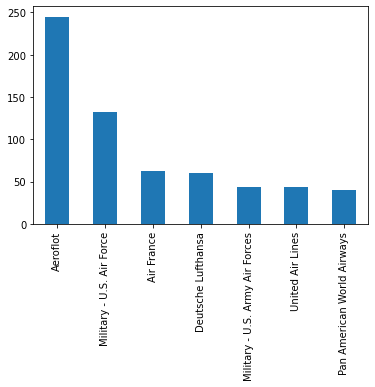

In [113]:
operator_crashes[operator_crashes>=40].plot(kind='bar')

In [114]:
us_airforce = df[df['operator']=='Military - U.S. Air Force']

In [115]:
us_airforce

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
688,1943-08-07,"Off Townsville, Australia",Military - U.S. Air Force,Townsville - Brisbane,Douglas C-47-DL,41-7733,27,23,4,27,23,4,0,Twenty minutes after taking off the aircraft c...
707,1943-12-19,"Canal Creek, Australia",Military - U.S. Air Force,Townsville - Rockhampton - Brisbane,Douglas C-47A-60-DL,43-30742,31,27,4,31,27,4,0,Crashed and exploded while en route.
735,1944-08-23,"Freckelton, England",Military - U.S. Air Force,NoRouteFound,Consolidated B-24H,42-50291,3,0,3,3,0,3,58,The bomber crashed into a school and a cafe wh...
779,1945-03-27,"Coral Sea, off Australia",Military - U.S. Air Force,Cooktown - Finschafen,Douglas C-47A-90-DL,43-16011,24,20,4,24,20,4,0,Disappeared en route.
786,1945-04-23,"North Barrule, Isle of Man, England",Military - U.S. Air Force,Ridgewell - Nutts Corner,B17G Flying Fortress,43-38856,31,26,5,31,26,5,0,"While cruising at an altitude of 2,000 feet, t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,1999-12-10,"Kuwait City, Kuwait",Military - U.S. Air Force,Kuwait IA - Kuwait-Ahmed Al-jaber AB,Lockheed C-130H,63-7854,94,86,8,3,3,0,0,"Crashed 2,900 ft. short of the runway causing..."
4370,2002-01-09,"Shamsi AFB, Pakistan",Military - U.S. Air Force,Jacobabad - Shamsi,Lockheed Hercules KC-130R,160021,7,0,7,7,0,7,0,While on approach the aircraft struck a hill a...
4396,2002-06-12,"Near Gardez, Afghanistan",Military - U.S. Air Force,NoRouteFound,Lockheed MC-130H Hercules,84-0475,10,2,8,3,0,3,0,While participating in a night mission to remo...
4404,2002-08-07,"Caguas, Puerto Rico",Military - U.S. Air Force,Roosevelt Roads NS - Borinquen NGB,Lockheed MC-130H Hercules,90-0161,10,3,7,10,3,7,0,The military plane crashed into a mountain top...


In [116]:
aeroflot= df[df['operator']=='Aeroflot']
aeroflot

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
360,1934-12-31,NotFound,Aeroflot,NoRouteFound,Tupolev ANT-9,NoRegistration,10,8,2,10,8,2,0,Crashed under unknown circumstances.
425,1936-07-28,"Kulyab, Tajikistan",Aeroflot,NoRouteFound,Tupolev ANT-9,NoRegistration,6,4,2,6,4,2,0,The landing gear failed on landing. The aircra...
470,1937-08-06,"Bistrita, Romania",Aeroflot,NoRouteFound,Douglas DC-2,CCCP-M25,5,2,3,5,2,3,0,"While en route, the plane caught fire and cras..."
623,1941-11-29,"Chardzhou, Turkmenistan",Aeroflot,Chardzhou - Urgench,Tupolev ANT-6,CP-L2010,36,31,5,7,5,2,0,"During the initial climb at night, the pilot i..."
625,1941-12-26,"Baiserke, Kazakhstan",Aeroflot,Almaty - Karaganda - Aktyubinsk - Kuybyshev - ...,Tupolev ANT-6,CCCP-L3043,34,28,6,26,21,5,0,The crew decided to takeoff in below-minima we...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801,1992-10-29,"Chita, Russia",Aeroflot,Petropavlovsk - Novosobrisk,Antonov AN-8,CCCP-69346,14,9,5,13,8,5,0,"Crashed 1,600m short of the runway threshold w..."
3951,1995-03-16,"Ossora, Russia",Aeroflot,Petropavlovsk - Ossora,Antonov 26B,RA-26084,10,4,6,9,3,6,0,The cargo plane flew into high ground while on...
3964,1995-06-16,"Herputchi, Russia",Aeroflot,Poliny - Nikolayevsk-on-Amur,Antonov AN-2,RA-07743,14,12,2,13,11,2,0,Flying VOR the plane ran into poor weather and...
4050,1996-10-08,"San Francesco al Campo, Italy",Aeroflot,"Moscow - Turin, Italy",Antonov An-124,RA-82069,23,0,23,2,0,2,2,The cargo plane struck trees and a house while...


In [117]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [118]:
us_crash_location = us_airforce['location'].str.split().str.get(-1).value_counts()
us_crash_location

Vietnam       13
Alaska         7
California     7
Washington     6
Japan          5
              ..
Deleware       1
Indiana        1
Azores         1
Territory      1
Russia         1
Name: location, Length: 64, dtype: int64

<AxesSubplot:>

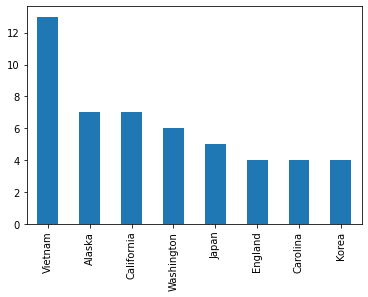

In [119]:
us_crash_location[us_crash_location>=4].plot(kind='bar')

In [120]:
us_states = pd.read_csv(r'C:\Users\NAMEERA\Downloads\us_states.csv')

In [121]:
us_states

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [122]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [123]:
from fuzzywuzzy import process

In [124]:
conda install -c conda-forge python-levenshtein

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [125]:
us_location_split = us_airforce['location'].str.split().str.get(-1)

In [126]:
us_location_split


688       Australia
707       Australia
735         England
779       Australia
786         England
           ...     
4240         Kuwait
4370       Pakistan
4396    Afghanistan
4404           Rico
4548        Albania
Name: location, Length: 132, dtype: object

In [127]:
for states in us_states['state']:
    matches = process.extract(states,us_location_split,limit= df.shape[0])
print(matches[0:5])
        

[('Wyoming', 100, 4042), ('Kong', 55, 1953), ('Washington', 47, 1357), ('Washington', 47, 1360), ('Washington', 47, 1892)]


In [128]:
trial = us_airforce['location'].str.split()
trial

688                  [Off, Townsville,, Australia]
707                     [Canal, Creek,, Australia]
735                         [Freckelton,, England]
779                  [Coral, Sea,, off, Australia]
786     [North, Barrule,, Isle, of, Man,, England]
                           ...                    
4240                       [Kuwait, City,, Kuwait]
4370                      [Shamsi, AFB,, Pakistan]
4396                  [Near, Gardez,, Afghanistan]
4404                       [Caguas,, Puerto, Rico]
4548                       [Near, Rovie,, Albania]
Name: location, Length: 132, dtype: object

In [129]:
df[df['location'].str.split().str.get(-1)=='California']

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
182,1929-03-30,"Near Beaumont, California",New Standard Airlines,Los Angeles - Phoenix - El Paso,Fokker F-VIIA,NC7888,4,3,1,4,3,1,0,The aircraft crashed into a high mountain ridg...
183,1929-04-21,"San Diego, California",Maddux Airlines / Military - U.S.Army Air Force,San Diego - Phoenix,Ford 5-AT-B Tri-Motor / B-PW-9D,NC9636 / 28-037,6,3,3,6,3,3,0,A midair collision occurred with a US Air For...
196,1929-09-02,"Needles, California",Associated Aviators,NoRouteFound,Lockheed Vega,NR859E,2,0,2,1,0,1,0,The plane crashed after going into a tail spin...
203,1929-09-17,"Jacumba, California",Pickwick Airways,Tijuana - Nogales,Fairchild 71,NoRegistration,2,0,2,1,0,1,0,The mail plane crashed into a hillside in the ...
217,1930-01-19,"Oceanside, California",Maddux Airlines,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,16,14,2,16,14,2,0,"While en route to Los Angeles, the pilot, flyi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,2004-10-24,"San Diego, California",Med Flight Air Ambulance - Private,"San Diego, CA - Albuquerque, NM",Learjet 35A,N30DK,5,4,1,5,4,1,0,"Two minutes after taking off, the air ambulanc..."
4614,2006-12-10,"Cajon Pass, California",Air ambulance - Mercy Air Services,Loma Linda - Victorville,Bell 412,N410MA,3,0,3,3,0,3,0,The air ambulance crashed on a repositioning f...
4673,2008-05-24,"Two Harbors, Catalina Island, California",Island Express Helicopter Service,Long Beach - Two Harbors,Eurocopter AS350D Astar,N67GE,6,5,1,4,3,1,0,The tour helicopter crashed near Banning House...
4689,2008-08-05,"Near Junction City, California",Junction City Fire Department,Ferrying fire fighters,Sikorsky S-61N,N612AZ,13,11,2,9,8,1,0,The helicopter was ferrying fire fighters in N...


In [130]:
#for states in us_states['State']:
    #iterate = df[df['location'].str.split().str.get(-1)==states]
   # print(iterate.head())


In [131]:
df[df['location'].str.split().str.get(-1)=='Alabama']

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
840,1946-01-06,"Birmingham, Alabama",Pennsylvania Central Airlines,"New York City - Birmingham, AL",Douglas DC-3,N21786,11,7,4,3,0,3,0,"In worsening weather conditions, the plane lan..."
1375,1953-02-14,"Off Mobile, Alabama",National Airlines,Miami - Orlando - New Orleans,Douglas DC-6,N90893,46,41,5,46,41,5,0,The aircraft crashed into the Gulf of Mexico o...
3358,1985-11-15,"Dothan, Alabama",Military - U.S. Air Force,Test flight,Convair CV-340,54-2817,4,0,4,4,0,4,0,Crashed during a test flight. The elevators lo...
3712,1991-07-10,"Birmingham, Alabama",L'Express Airlines,New Orleans - Mobile - Birmingham,Beechcraft BE-99-C99,N7217L,15,13,2,13,12,1,0,"While the aircraft was on approach, it entered..."
3844,1993-07-12,"Talladega, Alabama",Private,Birmingham - Talladega,"Helicopter, Hughes 369HS",N9116F,2,1,1,1,1,0,0,The helicopter crashed while attempting to lan...
4870,2013-08-14,"Birmingham, Alabama",United Parcel Service,Louisville - Birmingham,Airbus A300F-622R,N155UP,2,0,2,2,0,2,0,The cargo plane was on approach when it struck...


In [132]:
location

,date,location
0,1908-09-17,"Fort Myer, Virginia"
1,1909-09-07,"Juvisy-sur-Orge, France"
2,1912-07-12,"Atlantic City, New Jersey"
3,1913-08-06,"Victoria, British Columbia, Canada"
6,1915-03-05,"Tienen, Belgium"
...,...,...
5002,2021-03-02,"Pieri, Sudan"
5003,2021-03-28,"Near Butte, Alaska"
5004,2021-05-21,"Near Kaduna, Nigeria"
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar"


In [133]:
location_copy= location.copy()

In [134]:
location_copy = location_copy["location"].str.split(", ", n = 1, expand = True)

In [135]:
location_copy

,0,1
0,Fort Myer,Virginia
1,Juvisy-sur-Orge,France
2,Atlantic City,New Jersey
3,Victoria,"British Columbia, Canada"
6,Tienen,Belgium
...,...,...
5002,Pieri,Sudan
5003,Near Butte,Alaska
5004,Near Kaduna,Nigeria
5005,Near Pyin Oo Lwin,Myanmar


In [136]:
first_name= location_copy[0]
last_name= location_copy[1]

In [137]:
last_name

0                       Virginia
1                         France
2                     New Jersey
3       British Columbia, Canada
6                        Belgium
                  ...           
5002                       Sudan
5003                      Alaska
5004                     Nigeria
5005                     Myanmar
5007                      Russia
Name: 1, Length: 4709, dtype: object

In [138]:
last_name.value_counts()

Russia               241
Brazil               154
Colombia             141
California           109
France               103
                    ... 
Wantagh, New York      1
El Salvador            1
Baangladesh            1
Lorraine, France       1
Malagasy Republic      1
Name: 1, Length: 635, dtype: int64

In [139]:
location_copy1 = location.copy()

In [140]:
#type(iterate)

In [141]:
#iterate

In [142]:
column_names = df.columns
loc = pd.DataFrame(columns = column_names)
for states in us_states['state']:
    iteration = df[df['location'].str.split().str.get(-1)==states]
    loc = loc.append(iteration)

In [143]:
loc

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
840,1946-01-06,"Birmingham, Alabama",Pennsylvania Central Airlines,"New York City - Birmingham, AL",Douglas DC-3,N21786,11,7,4,3,0,3,0,"In worsening weather conditions, the plane lan..."
1375,1953-02-14,"Off Mobile, Alabama",National Airlines,Miami - Orlando - New Orleans,Douglas DC-6,N90893,46,41,5,46,41,5,0,The aircraft crashed into the Gulf of Mexico o...
3358,1985-11-15,"Dothan, Alabama",Military - U.S. Air Force,Test flight,Convair CV-340,54-2817,4,0,4,4,0,4,0,Crashed during a test flight. The elevators lo...
3712,1991-07-10,"Birmingham, Alabama",L'Express Airlines,New Orleans - Mobile - Birmingham,Beechcraft BE-99-C99,N7217L,15,13,2,13,12,1,0,"While the aircraft was on approach, it entered..."
3844,1993-07-12,"Talladega, Alabama",Private,Birmingham - Talladega,"Helicopter, Hughes 369HS",N9116F,2,1,1,1,1,0,0,The helicopter crashed while attempting to lan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1955-10-06,"Near Centennial, Wyoming",United Air Lines,Denver - Salt Lake City - San Francisco,Douglas DC-4,N30062,66,63,3,66,63,3,0,The aircraft crashed into cloud covered Medici...
3146,1981-10-01,"Casper, Wyoming",Sky Train Air,"Casper, WY - McAllen, TX",Learjet 24,N44CJ,3,1,2,3,1,2,0,"A loss of control, possibly initiated by an un..."
4020,1996-04-11,"Cheyenne, Wyoming",Private,"Cheyenne, WY - Lincoln, NE",Cessna 177B,N35207,3,2,1,3,2,1,0,"Seven- year-old trainee pilot, Jessica Dubroff..."
4042,1996-08-17,"Near Jackson Hole, Wyoming",Military - U.S. Air Force,"Jackson Hole, WY - New York, NY",Lockheed C-130H Hercules,74-1662,9,1,8,9,1,8,0,The plane struck a mountain. Failure of the cr...


In [144]:
loc_states= loc['location'].str.split().str.get(-1)

<AxesSubplot:>

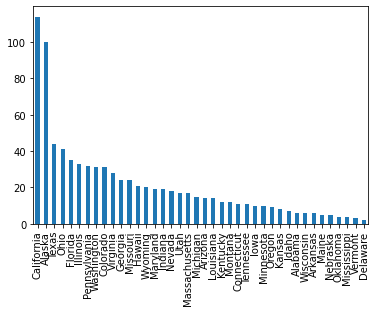

In [145]:
loc_states.value_counts().plot(kind='bar')

In [146]:
loc['location'] = loc['location'] + (', USA')
loc

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
840,1946-01-06,"Birmingham, Alabama, USA",Pennsylvania Central Airlines,"New York City - Birmingham, AL",Douglas DC-3,N21786,11,7,4,3,0,3,0,"In worsening weather conditions, the plane lan..."
1375,1953-02-14,"Off Mobile, Alabama, USA",National Airlines,Miami - Orlando - New Orleans,Douglas DC-6,N90893,46,41,5,46,41,5,0,The aircraft crashed into the Gulf of Mexico o...
3358,1985-11-15,"Dothan, Alabama, USA",Military - U.S. Air Force,Test flight,Convair CV-340,54-2817,4,0,4,4,0,4,0,Crashed during a test flight. The elevators lo...
3712,1991-07-10,"Birmingham, Alabama, USA",L'Express Airlines,New Orleans - Mobile - Birmingham,Beechcraft BE-99-C99,N7217L,15,13,2,13,12,1,0,"While the aircraft was on approach, it entered..."
3844,1993-07-12,"Talladega, Alabama, USA",Private,Birmingham - Talladega,"Helicopter, Hughes 369HS",N9116F,2,1,1,1,1,0,0,The helicopter crashed while attempting to lan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1955-10-06,"Near Centennial, Wyoming, USA",United Air Lines,Denver - Salt Lake City - San Francisco,Douglas DC-4,N30062,66,63,3,66,63,3,0,The aircraft crashed into cloud covered Medici...
3146,1981-10-01,"Casper, Wyoming, USA",Sky Train Air,"Casper, WY - McAllen, TX",Learjet 24,N44CJ,3,1,2,3,1,2,0,"A loss of control, possibly initiated by an un..."
4020,1996-04-11,"Cheyenne, Wyoming, USA",Private,"Cheyenne, WY - Lincoln, NE",Cessna 177B,N35207,3,2,1,3,2,1,0,"Seven- year-old trainee pilot, Jessica Dubroff..."
4042,1996-08-17,"Near Jackson Hole, Wyoming, USA",Military - U.S. Air Force,"Jackson Hole, WY - New York, NY",Lockheed C-130H Hercules,74-1662,9,1,8,9,1,8,0,The plane struck a mountain. Failure of the cr...


In [147]:
loc['location'].str.split().str.get(-1).value_counts()

USA    842
Name: location, dtype: int64

In [148]:
df.head()

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NoRegistration,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NoOperator,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NoRegistration,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NoRouteFound,Curtiss seaplane,NoRegistration,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NoRegistration,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...


In [149]:
values = pd.DataFrame(df['location'].str.split().str.get(-1).value_counts())

In [150]:
values

,location
Russia,246
Brazil,163
Colombia,147
Canada,125
France,115
...,...
Massachutes,1
Canada2,1
Indian,1
Tasmania,1


In [151]:
df['location'].str.split().str.get(-1).unique()

array(['Virginia', 'France', 'Jersey', 'Canada', 'Belgium', 'England',
       'Ohio', 'Pennsylvania', 'Italy', 'Maryland', 'Kent', 'UK',
       'Indiana', 'Iowa', 'Columbia', 'Spain', 'Illinois', 'Wyoming',
       'Minnisota', 'Wisconsin', 'Gibraltar', 'Nevada', 'Australia', 'NY',
       'Ocean', 'Germany', 'Morocco', 'Kingdom', 'Romania', 'Russia',
       'WY', 'Channel', 'Colombia', 'States', 'USSR', 'Hungary',
       'Mauritania', 'Czechoslovakia', 'York', 'Oregon', 'Idaho',
       'Algeria', 'Connecticut', 'Finland', 'Marseille,France', 'Uruguay',
       'Ariège', 'Nebraska', 'Brazil', 'Minnesota', 'Kansas',
       'Netherlands', 'Texas', 'Janeiro,Brazil', 'Washington',
       'Tennessee', 'Greece', 'California', 'Mexico', 'Algiers', 'Cuba',
       'Iran', 'Ontario', 'Sardinia', 'Madagascar', 'Missouri',
       'Argentina', 'Massachusetts', 'Denmark', 'China', 'Zealand',
       'Burma', 'Bulgaria', 'Africa', 'Utah', 'Thailand', 'Ilinois',
       'Florida', 'Michigan', 'Iraq', 'Chil

In [152]:
df['location'].unique()

array(['Fort Myer, Virginia', 'Juvisy-sur-Orge, France',
       'Atlantic City, New Jersey', ..., 'Near Kaduna, Nigeria',
       'Near Pyin Oo Lwin, Myanmar', 'Palana, Russia'], dtype=object)

unique_type = df['location'].str.split().str.get(-1).unique()
process.extract(last_name,unique_type,limit=len(unique_type))

In [153]:
df['location'].duplicated().value_counts()

False    3887
True      822
Name: location, dtype: int64

In [154]:
df[df['location'].duplicated()==True]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
35,1920-04-10,"Newark, New Jersey",US Aerial Mail Service,NoRouteFound,Curtiss R-4LM,49,2,1,1,1,0,1,0,After a fire erupted in flight the pilot decid...
38,1920-06-06,"Cleveland, Ohio",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,204,1,0,1,1,0,1,0,The aircraft suffered engine failure and crash...
57,1921-04-29,"Cleveland, Ohio",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,196,1,0,1,1,0,1,0,"The aircraft crashed in a field, short of the ..."
63,1922-01-14,"Paris, France",Handley Page Transport,NoRouteFound,Handley Page O/10,G-EATN,5,4,1,5,4,1,5,Crashed at Le Bourget field.
77,1923-01-17,"Barcelona, Spain",Grands Express Aeriens,NoRouteFound,Breguet 14,F-ALJU,1,0,1,1,0,1,0,Crashed into a mountain during a snowstorm.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020-02-05,"Istanbul, Turkey",Pegasus Airlines,Izmir - Istanbul,Boeing 737-86J,TC-IZK,177,171,6,3,3,0,0,While landing duriing high winds and heavey ra...
4996,2020-03-29,"Manila, Philippines",Lion Air Inc.,Manila - Tokyo,IAI 1124A Westwind II,RP-C5880,8,5,3,8,5,3,0,The air ambulance crashed on takeoff from runw...
4997,2020-05-22,"Karachi, Pakistan",Pakistan International Airline,Lahore - Karachi,Airbus A320-214,AP-BLD,99,91,8,97,89,8,1,"While landing, the aircraft scraped the runway..."
4999,2020-08-22,"Juba, South Sudan",South West Aviaiton,Juba - Wau,Antonov 26B,EX-126,8,5,3,7,4,3,0,The cargo plane lost height shortly after depa...


In [155]:
df[df['date'].duplicated()==True]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
41,1920-08-16,"College Park, Maryland",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,317,1,0,1,1,0,1,0,"While approaching in poor visibility to land, ..."
82,1923-08-27,"Bucharest, Romania",Campagnie France Roumaine,NoRouteFound,Blériot Spad 46,F-AEGN,2,1,1,2,1,1,0,Crashed while on approach to Bucharesst.
125,1927-04-22,"Goshen, Indiana",US Aerial Mail Service,NoRouteFound,Douglas M-4,626,1,0,1,1,0,1,0,Crashed into a field during a snow storm.
131,1927-09-17,Atlantic Ocean,Private,Old Orchad Beach - Rome,Fokker F7,NX703,3,1,2,3,1,2,0,"While flying 1,000 km east of the Canadian coa..."
143,1928-01-22,"Tarragona, Spain",Aeropostale,Casablanca - Alicante - Perpignan - Toulouse,Breguet 14,F-AHEQ,2,0,2,2,0,2,0,Crashed in unknown circumstances.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,2014-12-28,Java Sea,AirAsia,Surabaya - Singapore,Airbus A-320-216,PK-AXC,162,155,7,162,155,7,0,The aircraft went missing while en route from ...
4917,2015-10-02,"Near Masamba, Indonesia",Avistar Mandari,Masamba - Makassar,de Havilland DHC-6 Twin Otter,PK-BRM,10,7,3,10,7,3,0,The aircraft went missing minutes after talkin...
4919,2015-10-31,"Near Hasna, Egypt",Metrojet,Sharem el Sheikh - St. Petersburg,Airbus A321-231,EI-ETJ,224,217,7,224,217,7,0,Approximate 25 minutes after taking off from S...
4967,2018-03-11,"81 miles SW o fShahre Kurd, Iran",Mc Aviation,Sharjar - Istanbul,Canadair CL-600-2B16 Challenger 604,TC-TRB,11,8,3,11,8,3,0,"While enr oute, the aiircraft impacted the sid..."


In [156]:
df_drop_dup = df.drop_duplicates(['date'])

In [157]:
df_drop_dup

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NoRegistration,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NoOperator,Air show,Wright Byplane,SC1,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NoRegistration,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NoRouteFound,Curtiss seaplane,NoRegistration,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NoRegistration,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,2021-03-02,"Pieri, Sudan",South Sudan Supreme Airlines,Pieri - Yuai,Let L-410UVP-E,HK-4274,10,8,2,10,8,2,0,One of the engines on the aircraft failed 10 m...
5003,2021-03-28,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,2021-05-21,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NoRouteFound,Beechcraft B300 King Air 350i,NAF203,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14,12,2,12,11,1,0,The plane was carrying military personnel and ...


In [158]:
df_drop_dup['location'].duplicated().value_counts()

False    3585
True      733
Name: location, dtype: int64

In [159]:
df_drop_dup['operator'].duplicated().value_counts()

True     2280
False    2038
Name: operator, dtype: int64

In [160]:
df_drop_dup[df_drop_dup['operator'].duplicated()==True]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
10,1916-10-01,"Potters Bar, England",Military - German Navy,NoRouteFound,Zeppelin L-31 (airship),NoRegistration,19,0,19,19,0,19,0,Shot down in flames by the British 39th Home D...
24,1919-05-25,"Cleveland, Ohio",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,61,1,0,1,1,0,1,0,Caught fire in midair. The pilot leaped from t...
25,1919-07-19,"Dix Run, Pennsylvania",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,82,1,0,1,1,0,1,0,The mail plane crashed under unknown circumsta...
29,1919-10-14,"Cantonsville, Maryland",US Aerial Mail Service,NoRouteFound,Curtiss R-4LM,32,1,0,1,1,0,1,0,The pilot was performing a mail flight to Balt...
31,1919-10-30,"Long Valley, New Jersey",US Aerial Mail Service,NoRouteFound,De Havilland DH.4,77,1,0,1,1,0,1,0,While on a mail flight to New York the pilot e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,2019-09-11,"Toledo, Ohio",Private,Millington - Toledo,Convair CV-440F,N24DR,2,0,2,2,0,2,0,The Cargo plane was preparing to land at Toled...
4990,2019-10-04,"Lviv, Ukraine",Ukraine Air Alliance,Vigo - Lviv - Istanbul,Antonov An-12BK,UR-CAH,8,1,7,5,1,4,0,"The chartered cargo plane, planning to stop fo..."
5000,2020-09-25,"Near Chuguev, Ukraine",Military - Ukraine Air Force,Training,Antonov An26SH,76 yellow,27,20,7,26,19,7,0,"The military transport, crashed 1.2 miles from..."
5004,2021-05-21,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NoRouteFound,Beechcraft B300 King Air 350i,NAF203,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."


In [161]:
df_drop_dup.duplicated(subset=['location','operator']).value_counts()

False    4196
True      122
dtype: int64

In [162]:
df_drop_dup.loc[df_drop_dup.duplicated(subset=['location','operator'])]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
35,1920-04-10,"Newark, New Jersey",US Aerial Mail Service,NoRouteFound,Curtiss R-4LM,49,2,1,1,1,0,1,0,After a fire erupted in flight the pilot decid...
38,1920-06-06,"Cleveland, Ohio",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,204,1,0,1,1,0,1,0,The aircraft suffered engine failure and crash...
57,1921-04-29,"Cleveland, Ohio",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,196,1,0,1,1,0,1,0,"The aircraft crashed in a field, short of the ..."
99,1925-06-26,"Alicante, Spain",Grands Express Aeriens,Oran - Alicante,Lioré-et-Olivier LeO H-13,F-FREM,2,0,2,2,0,2,0,While attempting to land the seaplane hit a li...
144,1928-01-27,"Almeria, Spain",Aeropostale,Casablanca - Alicante - Perpignan - Toulouse,Breguet 14,F-AFHN,1,0,1,1,0,1,0,After experiencing turbulence the pilot's seat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436,2003-03-06,"Tamanrasset, Algeria",Air Algerie,Tamanrasset - Algiers,Boeing B-737-2T4,7T-VEZ,103,97,6,102,96,6,0,The starboard engine caught fire and failed wh...
4660,2008-01-17,"London, England",British Airways,"Bejing, China - London, England",Boeing 777-236ER,G-YMMM,152,136,16,0,0,0,0,The aircraft was on approach for landing on Ru...
4697,2008-09-14,"Perm, Russia",Aeroflot,Moscow - Perm,Boeing B-737-505,VP-BKO,88,82,6,88,82,6,0,The aircraft crashed into a ravine adjacent to...
4708,2008-12-20,"Denver, Colorado",Continental Airlines,Denver - Houston,Boeing 737-500,N18611,115,110,5,0,0,0,0,Before takeoff the crew were informed that the...


In [163]:
df_drop_dup.duplicated(subset=['location','operator','route']).value_counts()

False    4305
True       13
dtype: int64

In [164]:
df_drop_dup.loc[df_drop_dup.duplicated('route')]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NoRegistration,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
10,1916-10-01,"Potters Bar, England",Military - German Navy,NoRouteFound,Zeppelin L-31 (airship),NoRegistration,19,0,19,19,0,19,0,Shot down in flames by the British 39th Home D...
23,1918-12-16,"Elizabeth, New Jersey",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,97,1,0,1,1,0,1,0,Carl Smith was killed when his mail plane feet...
24,1919-05-25,"Cleveland, Ohio",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,61,1,0,1,1,0,1,0,Caught fire in midair. The pilot leaped from t...
25,1919-07-19,"Dix Run, Pennsylvania",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,82,1,0,1,1,0,1,0,The mail plane crashed under unknown circumsta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,2019-03-10,"Bishoftu, Ethiopia",Ethiopian Airlines,Addis Ababa - Nairobi,Boeing 737 Max 8,ET-AVJ,157,149,8,157,149,8,0,The internationally scheduled airliner crashed...
4988,2019-07-30,"Rawalpindi, India",Military - Pakistan Army,Training,Beechcraft B300 King Air,766,5,0,5,5,0,5,14,"The Pakistani military plane, on a training fl..."
4995,2020-02-05,"Istanbul, Turkey",Pegasus Airlines,Izmir - Istanbul,Boeing 737-86J,TC-IZK,177,171,6,3,3,0,0,While landing duriing high winds and heavey ra...
5000,2020-09-25,"Near Chuguev, Ukraine",Military - Ukraine Air Force,Training,Antonov An26SH,76 yellow,27,20,7,26,19,7,0,"The military transport, crashed 1.2 miles from..."


In [165]:
df_drop_dup.route.value_counts()

NoRouteFound                            521
Training                                 84
Sightseeing                              29
Test flight                              22
Sao Paulo - Rio de Janeiro                7
                                       ... 
Bogota - Lima                             1
Barksdale - Lajes                         1
Florence - Pisa - Rome                    1
Adana, Turkey - Balad Air Base, Iraq      1
Seven Islands - Jeannine Lake             1
Name: route, Length: 3460, dtype: int64

In [166]:
df_drop_dup.route.duplicated().value_counts()

False    3460
True      858
Name: route, dtype: int64

In [167]:
df_drop_dup[df_drop_dup.route.duplicated()==True]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NoRouteFound,Zeppelin L-8 (airship),NoRegistration,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
10,1916-10-01,"Potters Bar, England",Military - German Navy,NoRouteFound,Zeppelin L-31 (airship),NoRegistration,19,0,19,19,0,19,0,Shot down in flames by the British 39th Home D...
23,1918-12-16,"Elizabeth, New Jersey",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,97,1,0,1,1,0,1,0,Carl Smith was killed when his mail plane feet...
24,1919-05-25,"Cleveland, Ohio",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,61,1,0,1,1,0,1,0,Caught fire in midair. The pilot leaped from t...
25,1919-07-19,"Dix Run, Pennsylvania",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,82,1,0,1,1,0,1,0,The mail plane crashed under unknown circumsta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,2019-03-10,"Bishoftu, Ethiopia",Ethiopian Airlines,Addis Ababa - Nairobi,Boeing 737 Max 8,ET-AVJ,157,149,8,157,149,8,0,The internationally scheduled airliner crashed...
4988,2019-07-30,"Rawalpindi, India",Military - Pakistan Army,Training,Beechcraft B300 King Air,766,5,0,5,5,0,5,14,"The Pakistani military plane, on a training fl..."
4995,2020-02-05,"Istanbul, Turkey",Pegasus Airlines,Izmir - Istanbul,Boeing 737-86J,TC-IZK,177,171,6,3,3,0,0,While landing duriing high winds and heavey ra...
5000,2020-09-25,"Near Chuguev, Ukraine",Military - Ukraine Air Force,Training,Antonov An26SH,76 yellow,27,20,7,26,19,7,0,"The military transport, crashed 1.2 miles from..."


In [168]:
df_drop_dup.ac_type.duplicated().value_counts()

False    2211
True     2107
Name: ac_type, dtype: int64

In [169]:
df_drop_dup.operator.duplicated().value_counts()

True     2280
False    2038
Name: operator, dtype: int64

In [170]:
df_drop_dup[['operator','route']].duplicated().value_counts()

False    4050
True      268
dtype: int64

In [171]:
df_drop_dup.duplicated(subset=['location','operator','route'],keep=False).value_counts()

False    4295
True       23
dtype: int64

In [172]:
pd.set_option('display.max_colwidth', None)
dup= df_drop_dup[df_drop_dup.duplicated(subset=['location','operator','route'],keep= False)]
dup

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
24,1919-05-25,"Cleveland, Ohio",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,61,1,0,1,1,0,1,0,Caught fire in midair. The pilot leaped from the plane to his death as the plane began to go into a dive.
38,1920-06-06,"Cleveland, Ohio",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,204,1,0,1,1,0,1,0,The aircraft suffered engine failure and crashed shortly after taking off.
57,1921-04-29,"Cleveland, Ohio",US Aerial Mail Service,NoRouteFound,De Havilland DH-4,196,1,0,1,1,0,1,0,"The aircraft crashed in a field, short of the runway, a few minutes before its scheduled arrival in Cleveland. The weather was poor with fog."
117,1926-10-21,English Channel,Imperial Airways,Croydon - Paris,Handley Page W-10,G-EBMS,12,10,2,0,0,0,0,"The plane was on a flight from London to Paris when power was lost to the starboard engine. The aircraft began to lose altitude until it eventually ditched into the sea about 18 miles from the English coast. The plane stayed afloat long enough for the fishing boat Invicta, piloted by Captain Marshall, to rescue all aboard. The plane was named Prince Henry."
136,1927-11-16,Over the Gulf of Finland,Aero O-Y,Tallinn - Helsinki,Junkers F-13,K-SALD,6,4,2,6,4,2,0,Crashed in the gulf of Finland and never found.
154,1928-07-10,Over the Gulf of Finland,Aero O-Y,Tallinn - Helsinki,Junkers F-13,K-SALB,6,4,2,6,4,2,0,Crashed under unknown circumstances
422,1936-06-13,"Hannover, Germany",Deutsche Lufthansa,NoRouteFound,Junkers JU-160,D-UPYM,6,4,2,1,1,0,0,"The pilot attempted an emergency landing in a field after the engine failured. The aircraft was named ""Puma."""
435,1936-09-25,English Channel,Imperial Airways,Croydon - Paris,Boulton and Paul P-71,G-ACOX,2,0,2,2,0,2,0,Crashed under unknown circumstances while delivering mail.
585,1940-08-09,"Hannover, Germany",Deutsche Lufthansa,NoRouteFound,Douglas DC-2-115H,D-AIAV,13,10,3,2,2,0,0,No cause was described except it being pilot error.
595,1940-11-08,"Rio de Janeiro, Brazil",VASP,Rio de Janeiro - Sao Paulo,Junkers Ju53/2m,PP-SPF,18,14,4,18,14,4,0,"Midair collision with a private plane. After the collision, both aircraft crashed into the Botafogo Bay. Seventeen killed on the Junkers, 1 on the private plane."


In [173]:
dup['summary']

24                                                                                                                                                                                                                                                                                                                                                                 Caught fire in midair. The pilot leaped from the plane to his death as the plane began to go into a dive.
38                                                                                                                                                                                                                                                                                                                                                                                                The aircraft suffered engine failure and crashed shortly after taking off.
57                                                                            

In [174]:
df_drop_dup[df_drop_dup.duplicated(subset=['operator','summary','registration'],keep= False)]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary


In [175]:
df_drop_dup[df_drop_dup.duplicated(subset=['date'],keep= False)]

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary


From the observation above, it seems like all the crashes were legitimate and none are duplications. However, the recurrence of crashes at the same location or by the same operator may have caused the discrepancy of a duplicate value. Why have I concluded as such? The dates mentioned in the collected data are at least a year apart from one another if not months. 

I guess it is safe to say that the aircrafts being operated were rather not in a good condition for any flight to take place. From the observation made, weather conditions remain an outlier. Perhaps this perspective is wrong, thus leaving space for more exploratory data analysis to be conducted. 

In [176]:
conda install -c conda-forge textblob


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [177]:
from textblob import TextBlob
import re

In [178]:
spelling = df['location']
type(spelling)

pandas.core.series.Series

In [179]:
#spelling.apply(lambda txt: ''.join(TextBlob(txt).correct()))

In [180]:
#df.to_csv(r'C:\Users\Appolo\Desktop\aircrash.csv')

In [181]:
file = pd.ExcelFile(r'C:\Users\NAMEERA\Desktop\Data Science\countries.xlsx')
xls= pd.ExcelFile(file)

In [182]:
country = xls.parse(0)

In [183]:
country

,country,latitude,longitude,name,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,AD,42.546245,1.601554,Andorra,NaN,NaN,NaN
1,AE,23.424076,53.847818,United Arab Emirates,NaN,NaN,NaN
2,AF,33.939110,67.709953,Afghanistan,NaN,NaN,NaN
3,AG,17.060816,-61.796428,Antigua and Barbuda,NaN,NaN,NaN
4,AI,18.220554,-63.068615,Anguilla,NaN,NaN,NaN
...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN


In [184]:
country_name = country['name']

In [185]:
country_name

0                   Andorra
1      United Arab Emirates
2               Afghanistan
3       Antigua and Barbuda
4                  Anguilla
               ...         
240                   Yemen
241                 Mayotte
242            South Africa
243                  Zambia
244                Zimbabwe
Name: name, Length: 245, dtype: object

In [186]:
column_names_1 = df.columns
loc_2 = pd.DataFrame(columns = column_names_1)
for name in country['name']:
    count = df[df['location'].str.split().str.get(-1)==name]
    loc_2 = loc_2.append(count)

In [187]:
loc_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 2075 to 4949
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  3047 non-null   datetime64[ns]
 1   location              3047 non-null   object        
 2   operator              3047 non-null   object        
 3   route                 3047 non-null   object        
 4   ac_type               3047 non-null   object        
 5   registration          3047 non-null   object        
 6   all_aboard            3047 non-null   object        
 7   passengers_aboard     3047 non-null   object        
 8   crew_aboard           3047 non-null   object        
 9   all_fatalities        3047 non-null   object        
 10  passenger_fatalities  3047 non-null   object        
 11  crew_fatalities       3047 non-null   object        
 12  ground                3047 non-null   object        
 13  summary        

In [188]:
loc_2

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
2075,1963-12-12,"Gazni, Afghanistan",Trans Mediterranean Airways,Kawait - Kabul,Douglas C-54A,OD-AEB,3,0,3,3,0,3,0,"The cargo plane struck a mountain while en route. A wrong estimation of the wind speed and direction resulted in a navigation error which brought the aircraft 42 nm from the approved air route. Possible contributing factors were: lack of weather forecast prior to takeoff, personal worries, fatigue and lack of oxygen, inadequate charts and maps."
2679,1973-04-18,"Bamiyan, Afghanistan",Bakhtar Afghan Airlines,Bamiyan - Kabul,de Havilland Canada DHC-6 Twin Otter 100,YA-GAT,19,16,3,4,2,2,0,The chartered American/Canadian tour group's plane crashed on takeoff.
3218,1983-03-10,"Near Shach Goan, Afghanistan",Bakhtar Afghan Airlines,Uruzgan-Kaboul,de Havilland Canada DHC-6 Twin Otter 300,YA-GAZ,19,17,2,19,17,2,0,"Pilot decided to climb and continue to fly VFR in deteriorating weather. The plane crashed in an area of rain, turbulence and thunderstorms. Continued VFR flight in poor weather and a physical impairment due to lack of oxygen when flying at high altitude."
3297,1984-09-21,"Near Sarakchar, Afghanistan",Military - Russian Air Force,NoRouteFound,Antonov AN-12,NoRegistration,50,45,5,50,45,5,0,Shot down by Afghan rebels.
3301,1984-10-27,"Near Kabul, Afghanistan",Mililtary - Soviet Air Force,Tachkent-Kaboul,Ilyushin IL-76M,CCCP-86739,11,7,4,11,7,4,0,Shot down by enemy fire.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,1990-02-17,"Near Ngwerere, Zambia",Military - Zambian Air Force,M'bala - Likouala,DHC-5 Buffalo,AF316,29,24,5,29,24,5,0,Suddenly dove into a field as it prepared to land at Likouala.
4557,2005-05-18,"Mongu, Zambia",Military - Zambia Air Force,Lusaka - Livingstone - Mongu - Lusaka,Yunshuji Y-12,AF-216,13,8,5,13,8,5,0,The plane was on its routine operations of delivering military supplies and food to the drought-stricken parts of Southern and Western provinces of Zambia when the accident occurred. The plane took off from Lusaka and safely reached Livingstone and Mongu. It had just taken off from Mongu on its way back to Lusaka when it crashed.
1507,1955-02-23,"Salisbury, Zimbabwe",Central African Airways,Salisbury - Lusaka,Douglas DC-3,VP-YKO,26,21,5,1,0,1,0,The pilot began taking off and retracted the landing gear when smoke was observed in the cockpit. He attempted to belly land the plane. The propellers separated and penetrated the fuselage killing the fight engineer. The presence of smoke in the flight crew compartment in sufficient quantity to make the captain apprehensive of fire and to cause him to land the aircraft immediately with the landing gear retracted. A fractured rubber hose on the port engine connecting the rocker box of one of the lower cylinders to the collector box caused smoke to enter the wheel well and into the crew compartment.
1924,1961-11-22,"Harare, Zimbabwe",Rhodesian Air Services,Salisbury - Livingstone - Elizabethville,NotFound,VP-YRX,3,0,3,3,0,3,0,"The aircraft was on a charter flight to Livingstone to pick up United Nations troops on leave and take them back to Elizabethville. It took off from Salisbury Airport, and shortly after take-off suddenly dipped its right wing. After a slow recovery, it climbed away to between 100 - 150 ft and then went into a turn to the left with the port propeller windmilling. This turn continued to get steeper until the aircraft rolled over and dived inverted to the ground . The accident was caused by failure of the pilot to execute a successful single engine forced landing after concluding that there had been a power loss in the port engine. Evidence indicated that a failure of the port engine did not, in fact, occur. The pre-take-off rudder trimmer check was not carried out correctly as laid down in the checklist, and the aircraft took off with full left rudder trim a

In [189]:
loc_2['location'].str.split().str.get(-1).unique()

array(['Afghanistan', 'Albania', 'Armenia', 'Angola', 'Antarctica',
       'Argentina', 'Austria', 'Australia', 'Azerbaijan', 'Barbados',
       'Bangladesh', 'Belgium', 'Bulgaria', 'Bahrain', 'Benin', 'Bermuda',
       'Bolivia', 'Brazil', 'Bahamas', 'Bhutan', 'Botswana', 'Canada',
       'Switzerland', 'Chile', 'Cameroon', 'China', 'Colombia', 'Cuba',
       'Cyprus', 'Germany', 'Djibouti', 'Denmark', 'Algeria', 'Ecuador',
       'Estonia', 'Egypt', 'Eritrea', 'Spain', 'Ethiopia', 'Finland',
       'Fiji', 'Micronesia', 'France', 'Gabon', 'Georgia', 'Guernsey',
       'Ghana', 'Gibraltar', 'Greenland', 'Gambia', 'Guinea',
       'Guadeloupe', 'Greece', 'Guatemala', 'Guam', 'Guyana', 'Honduras',
       'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland', 'India',
       'Iraq', 'Iran', 'Iceland', 'Italy', 'Jersey', 'Jamaica', 'Jordan',
       'Japan', 'Kenya', 'Kyrgyzstan', 'Cambodia', 'Comoros', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liberia', 'Lesotho',
       'Luxembo

In [190]:
loc_2['location'].str.split().str.get(-1).value_counts()

Russia      246
Brazil      163
Colombia    147
Canada      125
France      115
           ... 
Bhutan        1
Moldova       1
Albania       1
Kuwait        1
Eritrea       1
Name: location, Length: 145, dtype: int64

In [191]:
location

,date,location
0,1908-09-17,"Fort Myer, Virginia"
1,1909-09-07,"Juvisy-sur-Orge, France"
2,1912-07-12,"Atlantic City, New Jersey"
3,1913-08-06,"Victoria, British Columbia, Canada"
6,1915-03-05,"Tienen, Belgium"
...,...,...
5002,2021-03-02,"Pieri, Sudan"
5003,2021-03-28,"Near Butte, Alaska"
5004,2021-05-21,"Near Kaduna, Nigeria"
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar"


In [192]:
location.iloc[2,:]

date              1912-07-12 00:00:00
location    Atlantic City, New Jersey
Name: 2, dtype: object

In [193]:
location

,date,location
0,1908-09-17,"Fort Myer, Virginia"
1,1909-09-07,"Juvisy-sur-Orge, France"
2,1912-07-12,"Atlantic City, New Jersey"
3,1913-08-06,"Victoria, British Columbia, Canada"
6,1915-03-05,"Tienen, Belgium"
...,...,...
5002,2021-03-02,"Pieri, Sudan"
5003,2021-03-28,"Near Butte, Alaska"
5004,2021-05-21,"Near Kaduna, Nigeria"
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar"


In [194]:
loc

,date,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
840,1946-01-06,"Birmingham, Alabama, USA",Pennsylvania Central Airlines,"New York City - Birmingham, AL",Douglas DC-3,N21786,11,7,4,3,0,3,0,"In worsening weather conditions, the plane landed fast and high while making an instrument approach to Birmingham, overran the runway, crashed through the barrier fence and into a creek. The action of the pilot in committing himself to a landing from an approach which was too high and too fast."
1375,1953-02-14,"Off Mobile, Alabama, USA",National Airlines,Miami - Orlando - New Orleans,Douglas DC-6,N90893,46,41,5,46,41,5,0,"The aircraft crashed into the Gulf of Mexico off Mobile, Alabama. The aircraft broke up in the turbulence of a ""frontal wave"" storm after failure of the left wing. The loss of control followed by the in-flight failure and separation of portions of the airframe structure while the aircraft was traversing an intense frontal-wave type storm of extremely severe turbulence, the severity and location of which the pilot had not been fully informed."
3358,1985-11-15,"Dothan, Alabama, USA",Military - U.S. Air Force,Test flight,Convair CV-340,54-2817,4,0,4,4,0,4,0,Crashed during a test flight. The elevators locked soon after takeoff.
3712,1991-07-10,"Birmingham, Alabama, USA",L'Express Airlines,New Orleans - Mobile - Birmingham,Beechcraft BE-99-C99,N7217L,15,13,2,13,12,1,0,"While the aircraft was on approach, it entered an area of thunderstorms. The aircraft rolled left and pitched up as the aircraft approached level flight. The aircraft then stalled and started to descend. The descent couldn't be arrested and the aircraft crashed into a residential area, destroying two homes and two automobiles. Decision by the pilot-in-command to continue instrument approach into thunderstorm conditions resulting in loss of control of the aircraft. The pilot and one passenger survived the accident."
3844,1993-07-12,"Talladega, Alabama, USA",Private,Birmingham - Talladega,"Helicopter, Hughes 369HS",N9116F,2,1,1,1,1,0,0,"The helicopter crashed while attempting to land in a confined area of the infield of the Talladega Super Speedway. The pilot of the helicopter, NASCAR race car driver Davey Allison, 30, killed. The pilot's poor in-flight decision to land downwind in a confined area that was surrounded by high obstructions, and his failure to properly compensate for the tailwind condition."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1955-10-06,"Near Centennial, Wyoming, USA",United Air Lines,Denver - Salt Lake City - San Francisco,Douglas DC-4,N30062,66,63,3,66,63,3,0,"The aircraft crashed into cloud covered Medicine Bow Peak while en route. The plane failed to clear the 12,013 ft. peak by 75 feet. The pilot deviated from course for reasons unknown. Possible incapacitation of crew by carbon monoxide emanating from a faulty cabin heater, though never proven."
3146,1981-10-01,"Casper, Wyoming, USA",Sky Train Air,"Casper, WY - McAllen, TX",Learjet 24,N44CJ,3,1,2,3,1,2,0,"A loss of control, possibly initiated by an unexpected encounter with moderate to severe clear air turbulence, which caused the aircraft to depart the narrow flight envelope boundaries in which it was operating and from which recovery was not effected."
4020,1996-04-11,"Cheyenne, Wyoming, USA",Private,"Cheyenne, WY - Lincoln, NE",Cessna 177B,N35207,3,2,1,3,2,1,0,"Seven- year-old trainee pilot, Jessica Dubroff, accompanied by her father (a passenger) and the pilot-in-command, were engaged in a trans-continental record attempt involving 6,660 miles of flying in 8 consecutive days. The plane departed towards a nearby thunderstorm in deteriorating weather. Witnesses describe the plane's climb rate and speed as slow and they observed the aircraft enter a roll consistent with a stall. The plane's gross weight was 84 pounds over the maximum limit. Pilot's impro

In [195]:
country

,country,latitude,longitude,name,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,AD,42.546245,1.601554,Andorra,NaN,NaN,NaN
1,AE,23.424076,53.847818,United Arab Emirates,NaN,NaN,NaN
2,AF,33.939110,67.709953,Afghanistan,NaN,NaN,NaN
3,AG,17.060816,-61.796428,Antigua and Barbuda,NaN,NaN,NaN
4,AI,18.220554,-63.068615,Anguilla,NaN,NaN,NaN
...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN


In [196]:
country_name

0                   Andorra
1      United Arab Emirates
2               Afghanistan
3       Antigua and Barbuda
4                  Anguilla
               ...         
240                   Yemen
241                 Mayotte
242            South Africa
243                  Zambia
244                Zimbabwe
Name: name, Length: 245, dtype: object

In [197]:
lct = df['location'].str.split(',',expand=True)

In [198]:
lct

,0,1,2,3
0,Fort Myer,Virginia,None,None
1,Juvisy-sur-Orge,France,None,None
2,Atlantic City,New Jersey,None,None
3,Victoria,British Columbia,Canada,None
6,Tienen,Belgium,None,None
...,...,...,...,...
5002,Pieri,Sudan,None,None
5003,Near Butte,Alaska,None,None
5004,Near Kaduna,Nigeria,None,None
5005,Near Pyin Oo Lwin,Myanmar,None,None


In [199]:
lct= lct.drop([2,3],axis=1)

In [200]:
lct

,0,1
0,Fort Myer,Virginia
1,Juvisy-sur-Orge,France
2,Atlantic City,New Jersey
3,Victoria,British Columbia
6,Tienen,Belgium
...,...,...
5002,Pieri,Sudan
5003,Near Butte,Alaska
5004,Near Kaduna,Nigeria
5005,Near Pyin Oo Lwin,Myanmar


In [201]:
lct = lct.drop(0,axis=1)
lct

,1
0,Virginia
1,France
2,New Jersey
3,British Columbia
6,Belgium
...,...
5002,Sudan
5003,Alaska
5004,Nigeria
5005,Myanmar


In [202]:
lct[1].unique()

array([' Virginia', ' France', ' New Jersey', ' British Columbia',
       ' Belgium', ' England', ' Ohio', ' Pennsylvania', ' Italy',
       ' Maryland', ' Kent', ' Surrey', ' Indiana', ' Iowa', ' Columbia',
       ' Spain', ' Illinois', ' Wyoming', ' Minnisota', ' Wisconsin',
       None, ' Nevada', ' Australia', ' NY', ' Germany', ' Lorraine',
       ' Morocco', ' Picrdie', ' United Kingdom', ' Romania',
       ' Buckinghamshire', ' WY', ' Colombia', ' Georgia', ' Hungary',
       ' Mauritania', ' Czechoslovakia', ' New York', ' Oregon', ' Qld',
       ' Idaho', ' Algeria', ' Connecticut', 'France', ' Uruguay',
       ' Ariège', ' Nebraska', ' Brazil\r\nFlorianopolis', ' Minnesota',
       ' Kansas', ' Netherlands', ' BC', ' Texas', 'Brazil',
       ' Washington', ' Tennessee', ' Greece', ' West Virginia',
       ' California', ' Mexico', '  Pest Hungary', ' Cuba', ' Bavaria',
       ' New Mexico', ' Russia', ' near Grants', ' Iran', ' Ontario',
       ' East Sardinia', ' Madagascar'

In [204]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4709 entries, 0 to 5007
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  4709 non-null   datetime64[ns]
 1   location              4709 non-null   object        
 2   operator              4709 non-null   object        
 3   route                 4709 non-null   object        
 4   ac_type               4709 non-null   object        
 5   registration          4709 non-null   object        
 6   all_aboard            4709 non-null   int32         
 7   passengers_aboard     4709 non-null   int32         
 8   crew_aboard           4709 non-null   int32         
 9   all_fatalities        4709 non-null   int32         
 10  passenger_fatalities  4709 non-null   int32         
 11  crew_fatalities       4709 non-null   int32         
 12  ground                4709 non-null   int32         
 13  summary           